# One Way Analysis of variance (ANOVA) using Bayesian estimation

In [4]:
import pystan as ps
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix, dmatrices
from patsy.contrasts import Treatment, Sum

In [5]:
working_directory = r"C:\Users\harri\OneDrive\Documents\Repositories\Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists\Data"
os.chdir(working_directory)

df = pd.read_csv("James et al 2015 Experiment 2 Data Set.csv")
df.head()

,Condition,Time_of_Day,BDI_II,STAI_T,pre_film_VAS_Sad,pre_film_VAS_Hopeless,pre_film_VAS_Depressed,pre_film_VAS_Fear,pre_film_VAS_Horror,pre_film_VAS_Anxious,...,Day_Zero_Number_of_Intrusions,Days_One_to_Seven_Number_of_Intrusions,Visual_Recognition_Memory_Test,Verbal_Recognition_Memory_Test,Number_of_Provocation_Task_Intrusions,Diary_Compliance,IES_R_Intrusion_subscale,Tetris_Total_Score,Self_Rated_Tetris_Performance,Tetris_Demand_Rating
0,1,2,1,33,0.0,0.0,0.0,0.4,0.3,0.8,...,2,4,15,18,5,9,0.62,9999,9999.0,0
1,1,2,3,27,1.9,0.7,0.5,0.8,0.2,0.2,...,2,3,17,19,4,9,0.62,9999,9999.0,0
2,1,1,10,42,2.2,1.2,0.9,0.2,0.1,0.4,...,5,6,12,21,0,10,0.50,9999,9999.0,0
3,1,1,1,41,1.2,1.0,0.6,5.1,0.4,0.5,...,0,2,16,19,0,8,0.50,9999,9999.0,3
4,1,2,1,27,0.2,0.1,0.0,2.9,0.0,0.7,...,5,3,14,22,10,8,1.00,9999,9999.0,-7


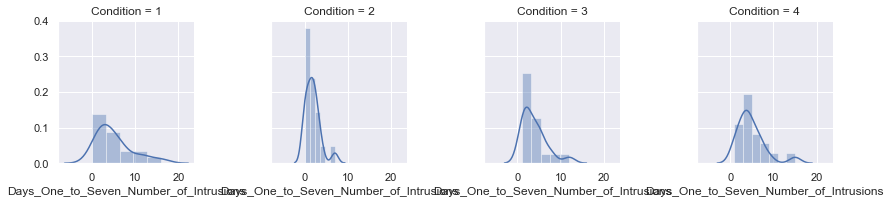

In [6]:
sns.set()
g= sns.FacetGrid(df, col="Condition")
g.map(sns.distplot,  "Days_One_to_Seven_Number_of_Intrusions")

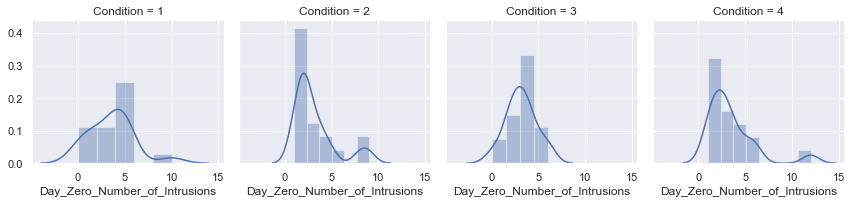

In [7]:
g= sns.FacetGrid(df, col="Condition")
g.map(sns.distplot,  "Day_Zero_Number_of_Intrusions")


In [8]:
#df["Condition_cat"] = df["Condition"].astype('category')
#dmatrix("C(Condition_cat)", df)
#dm = dmatrices("Day_Zero_Number_of_Intrusions ~ Condition_cat", df

In [21]:
#Genrated desigb matrix for Regression analysis with treatment coding
levels = [2,1,3,4]

contrast = Treatment(reference=0).code_without_intercept(levels)
contrasts_Treatment = contrast.matrix[df.Condition-1, :]
contrasts_Treatment

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [10]:
One_wayANOVA = """
data{
int<lower=0> Rows; // Number of rows in the contrast matix
int<lower=0> Columns; // Number columns

vector[Rows] DV; // Dependent variable data points

matrix[Rows,Columns] x; //Contrast matrix
}

parameters{
real<lower=0> alpha; // intercept

vector[Columns] coef; // Beta coefficients 

real<lower=0> sigma;

}
model{
//priors


//likelihood
DV ~ normal(alpha + x*coef  , sigma);
}
"""

In [11]:
sm = ps.StanModel(model_code = One_wayANOVA)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_68bd74173720069c75ee9128b853c294 NOW.


In [61]:
data = {'Rows': len(df),
       'Columns': contrasts_Treatment.shape[1],
       'DV': df["Day_Zero_Number_of_Intrusions"],
        'x': Reordered}



In [62]:
fit = sm.sampling(data = data, iter = 2000, chains=4, seed= 302675)

In [63]:
print(fit);


Inference for Stan model: anon_model_68bd74173720069c75ee9128b853c294.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha     3.11    0.01   0.52   2.12   2.76    3.1   3.46   4.16   1359    1.0
coef[1]   0.44    0.02   0.74  -1.03  -0.04   0.46   0.95   1.83   1809    1.0
coef[2]   0.05    0.02   0.75  -1.41  -0.46   0.05   0.54   1.51   1651    1.0
coef[3]   0.32    0.02   0.74  -1.17  -0.17   0.35   0.82   1.79   1833    1.0
sigma      2.3  3.7e-3    0.2   1.93   2.15   2.28   2.42   2.74   3064    1.0
lp__    -93.03    0.04   1.59 -96.97 -93.83 -92.69 -91.84 -90.92   1829    1.0

Samples were drawn using NUTS at Tue Dec  1 19:41:46 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


# Sum contrast

In [ ]:
levels = [1,2,3,4]

contrast = Sum().code_without_intercept(levels)
contrasts_sum = contrast.matrix[df.Condition-1, :]
contrasts_sum;

In [ ]:
data_1 = {'Rows': len(df),
       'Columns': contrasts_sum.shape[1],
       'DV': df["Day_Zero_Number_of_Intrusions"],
        'x': contrasts_sum}
data_1;

In [ ]:
fit_1 = sm.sampling(data = data_1, iter = 2000, chains=4, seed= 302675)

In [ ]:
print(fit_1)

In [47]:
Reordered= np.array(dmatrix("C(Condition, levels=levels)", df))[:,1:4]
Reordered;
#contrasts_Treatment;

In [60]:
a = df[df["Condition"] == 2]
np.mean(a["Day_Zero_Number_of_Intrusions"])

3.111111111111111